# Introduction to Probability
## Data Science 350

Now that you have learned a bit about counting and combinatorics, let's put this knowledge to use by computing some probabilities. 

## Probability for dice

Let's start with some simple examples of computing probabilities for rolls of a pair of dice. Once we can use combinatorics to enumerate all possible states following a series of events, we can also compute probabilities of these events. 

Let's start by enumerating all of the possible end states from throwing two dice. We will assume that these dice are 'fair'.  In other words, the chance there is an equal probability that any face of the dice will land pointing up. In terms of probability, we say that the distribution of scores for each die follows a **Uniform distribution**. further, we assume that the dice are indentical and that the score for each dice is not dependent on the other dice. In the terminology of probability, we can now say that the score of each dice is **Independent Identically Distributed**, or **iid**.  

The code in the cell below computes as table with all possible outcomes. Run this code and examine the  results. 

In [8]:
##-----Two Dice Example ------
twoDice = expand.grid(1:6,1:6)
twoDice

Var1,Var2
1,1
2,1
3,1
4,1
5,1
6,1
1,2
2,2
3,2
4,2


As a first step in computing the probabilities, we need to find how many ways we can get into each state. In the case of the dice, how many ways can we roll each score (sum of the numbers shown on the upper side of the dice). The figure below shows an example of the number of ways we can roll a 7 or a 10.

![](img/Dice.jpg)

The code in the table below computes the score for each state in our table, as well as determining if the score is a result of a double. Execute this code and examine the results.

In [9]:
twoDice$sum = twoDice$Var1 + twoDice$Var2
twoDice$isdouble = twoDice$Var1 == twoDice$Var2 ## == is logical equals
twoDice

Var1,Var2,sum,isdouble
1,1,2,TRUE
2,1,3,FALSE
3,1,4,FALSE
4,1,5,FALSE
5,1,6,FALSE
6,1,7,FALSE
1,2,3,FALSE
2,2,4,TRUE
3,2,5,FALSE
4,2,6,FALSE


Next, we need to transform this table enumerating the states to a frequency table with the counts of states. Execute the code in the cell below to do just this.

In [10]:
# Count different sums
sumCounts = table(twoDice$sum)
sumCounts


 2  3  4  5  6  7  8  9 10 11 12 
 1  2  3  4  5  6  5  4  3  2  1 

Examine this table. Which score is the most likely, and  which scores are least likely?

Finally, we can compute and plot the probabilites of the possible scores from rolling two dice. For situations where the outcomes are discrete states, the probability of each state is just the number of ways that state can occur divided by the total number of possible states. This is done to ensure the sum of all probabilities adds to 1.0. 

Execute the code in the cell below and examinethe result. 

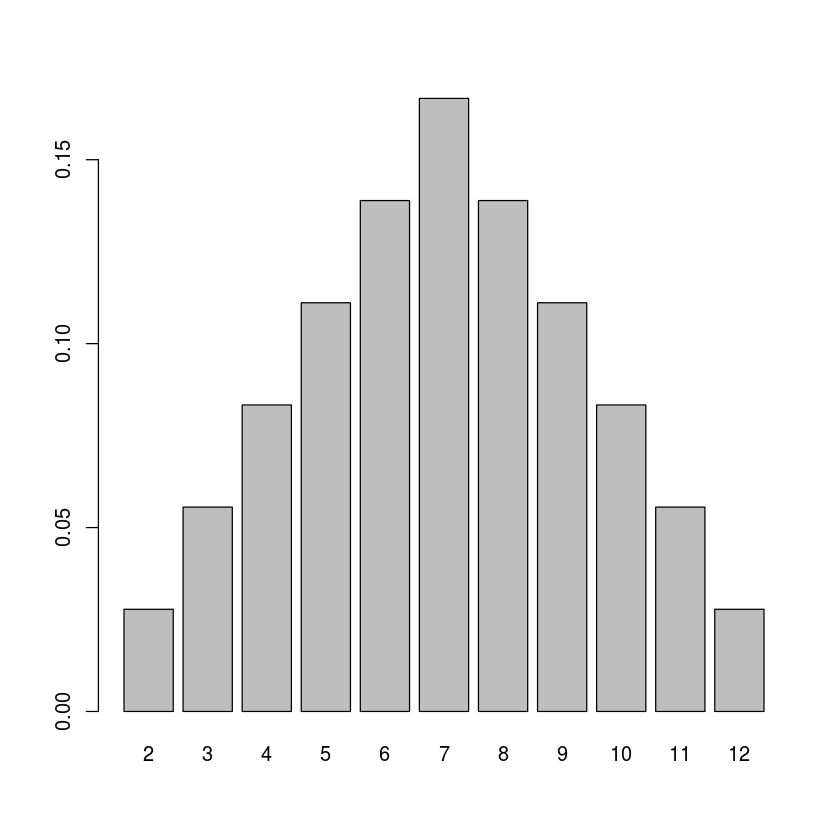

In [11]:
require(MASS) # Includes the fractions function
# Probabilities of sums: 
sumProb = fractions(table(twoDice$sum)/nrow(twoDice)) 
barplot(sumProb)

Examine this result. Notice that the probabilities are proportional to the frequencies, but are scaled to ensure they add to 1.0.



In [12]:
sumProb


   2    3    4    5    6    7    8    9   10   11   12 
1/36 1/18 1/12  1/9 5/36  1/6 5/36  1/9 1/12 1/18 1/36 

***
**Your turn:** Create and execute the code in the cell below to compute the probability of rolling a double. You can compute the total number of doubles from the `twoDice` data frame and normalize by the number of possible cases.d **Hint:** Use the `fractions` function from the 'MASS' library to display the probability as a fraction which you might find easier to interpret.
***

In [6]:
fractions(sum(twoDice$Var1 == twoDice$Var2)/nrow(twoDice))

[1] 1/6

## Basics of Probability

We will now investigate some basics of probability in a bit more detail.  

### Discrete probability

A **discrete distribution** is a probability distribution describing a process with discrete outcomes. By discrete outcomes, we mean outcomes that have specific states which we can count. We have already investigate an example of a discrete process when we examined the outcome of dice throws. Each die lands with a certain side up and the sum of the two numbers is the total score. 

For a discrete distribution the probability of an event, A, is the number of ways A can occur, divided by the number of total possible outcomes in our Sample Space, S. Let's make this concrete with an example. In the figure below there are 10 events in S, 6 in set A, and 4 in set B.

![](img/Prob1.png)

The probability of the events in a subset, A, given a set of possible events in the sample space, S, can be computed as follows:

$$P(A) = \frac{N(A)}{N(S)}$$

In this case there are 10 events in S, 6 events in subset A and 4 in subset B. We can compute the probabilities of A and B like this:

$$P(A) = \frac{6}{10} = \frac{3}{5} = 0.6\\
P(B) = \frac{4}{10} = \frac{2}{5} = 0.4$$

***
**Your turn:** in the cell below find the probability that the score from a throw of a pair of dice will be less than or equal to 3. Hints: use filters on the `twoDice` data frame and the `nrow` function to get the counts. The `fractions` function will make your result easier to interpret.
***

In [12]:
fractions(sum((twoDice$Var1 + twoDice$Var2) <= 3)/nrow(twoDice))

[1] 1/12

In [13]:
(twoDice$Var1 + twoDice$Var2) <= 3

[1]  TRUE  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

In [14]:
sum((twoDice$Var1 + twoDice$Var2) <= 3)

[1] 3

In [7]:
nrow(twoDice)

[1] 36

### Axioms of probability

All probability distributions must have a certian properties, which we refer to as the **axioms of probability**. These are:

- Probability for any set, A, is bounded between 0 and 1:  

$$ 0 \le P(A) \le 1 $$

- Probability of the Sample Space = 1: 

$$P(S) = \sum_{All\ i}P(a_i) = 1$$

- The probability of finite independent unions is the sum of their probabilities:

$$P(A \cup B) = P(A) + P(B)\\ if\ and\ only\ if\\ A \cap B = 0$$

***
**Your turn:** In the cell below create and execute the R code to show that $P(S) = 1$ for the simple set example we are using.
***

In [16]:
10/10

[1] 1

### Set operatons and probability

Set operations can be readily applied to probability problems. Continuing with our example, we can apply the following common set operations.

- **Intersection:** 
$$P(A \cap B)  = \frac{2}{10} = \frac{1}{5} = 0.2$$

- **Union:** 
$$P(A \cup B) = \frac{8}{10} = \frac{4}{5} = 0.8$$

- **Negation:** 
$$P(A)' = \frac{4}{10} = \frac{2}{5} = 0.4$$

You can use this basic operations to create more complex operations. For example:

$$P((A \cup B)') = P(A' \cap B') = P(C) = \frac{2}{10} = 0.2$$

We can also write an expression like the following:

$$P(A \cup B) = P(A) + P(B) - P(A \cap B)$$

### Independence vs. mutual exclusivity

In probability there are two concepts which are quite different but often confused, mutual exclusivity and independence.

Events in B are considered **independent** of events in A, if events in B have no effect on events in A. For independent events, we can write the following:

$$P(A \cap B) = 0\\
then\\
P(A \cup B) = P(A) + P(B)$$

If A and B are **mutually exclusive** an event in B means there are can be no event in A and vice versa. For mutually exclusive events, we can write:

$$P(A \cap B) = 0 = Empty\ set\\
and\\
P(A \cup B) = P(A) + P(B)\\
because\ either\\
P(A) = 0\\
or\\
P(B) = 0
$$



***
**Your turn:** Consider the diagram of event sub-sets in the figure below:

![](img/ME.jpg)

Write and execute the R code to compute the following:
$$P(A \cup B)\\
P(A \cap B)\\
P((A \cup B)')$$
***

In [19]:
cat('P Union = ', 6/10, '\n')
cat('P Intersection = ', 0, '\n')
cat('P NOT Union = ', 4/10)

P Union =  0.6 
P Intersection =  0 
P NOT Union =  0.4

### Conditional probability
![](img/Prob1.png)

**Conditional probability** is the probility that event A occurs given that event B has occured. We can write conditional probability as follow, which we say is the probability of A given B:

$$P(A|B)$$

We can work out this conditional probabilty as follows:

$$P(A|B) = \frac{P(A \cap B)}{P(B)} = \frac{\frac{2}{10}}{\frac{4}{10}} = \frac{2}{4} = \frac{1}{2}$$

If event A is **independent** of B, then:

$$P(A|B) = P(A)$$

But, just because A is independent of B, does not mean B is independent of A. Or, in terms of our notation:

$$P(A|B) = P(A)\\ does\ not\ imply\\ P(B|A) = P(B)$$

For example, the probability that your boss will approve your vacation request may be dependent on when she wishes to take vacation. However, it is unlikely that the probability that your boss takes vacation is dependent of when you wish to take vacation. 

###  Conditional Probability Example

Let's try an example of using conditional probabilities to work out the chance of having a rare disease. The scenario is as follows:

1. Sickle Cell Anemia is a serious, but fairly rare disease.
 - $S \Rightarrow$ a patient has the disease. 
 - The probability that a given patient has the disease is $P(S) = \frac{1}{3200} = 0.0003125$.
 - $S' \Rightarrow$ a parient does not have the disease.
 - $\oplus \Rightarrow$ patient tests positive.
 - $- \Rightarrow$ a patient tests negative.
2. A medical company claims that its test is 99% accurate, giving:
  - $P(S |\oplus) = 0.99$
  - $P(S'|-) = 0.99$
  
On the surface, it seems that a 99% reliable test should be rather good. But, let's dig into the conditional probabiilites and see how things reallly work out. 

The figure below shows a **conditional probability tree** for this problem. 

![](img/CondTree.jpg)

If you follow the tree from the root you can visualize the computation of probabilities for each of the 4 possible outcomes of a test on a patient. Let's summarize the conditional probabilities we need to compute for these outcomes:

- $P(\oplus | S)$ is the conditional probability the test will correctly identify a patient with the disease. 
- $P(- | S)$; is the conditional probability of a negative test for a patient with the disease. We call this situation a **Type II Error** or **False Negative**.
-  $P(\oplus | S')$ is the conditional probability a patient with no disease will test positive. We call this situation a **Type I Error** or **False Positive**.
- $P(- | S')$; is the conditional probability of a negative test for a patient who does not have the disease.

Let's start with the easy cases. We know the probability of a patient having the disease and we know the accuracy of the test. In the code cell below, create and execute the R code to compute the conditional probabilities of a positive test given the patient has the disease, and a negative test given the patient does not have the disease. 

In [20]:
pDisease = 0.0003125
pNotDisease = 1 - pDisease
pCorrect = 0.99
pError = 1 - pCorrect
pCorDisease = pDisease * pCorrect
pCorNotDisease = pNotDisease * pCorrect
cat(pCorDisease, pCorNotDisease)

0.000309375 0.9896906

So far, so good. Next, let's compute the conditional probabilities for the cases where our test is in error. In the code cell below, create and execute the R code to compute the conditional probabilities of a negative test given the patient has the disease, and a positive test given the patient does not have the disease. Compare these results to the conditional probabilities you computed above. 

In [21]:
pErDisease = pError * pDisease
pErNotDisease = pError * pNotDisease
cat(pErDisease, pErNotDisease)

3.125e-06 0.009996875

Propability of false postive (0.009996875) is greater than the probability of actually having the disease (0.000309375)
It's more likely the test will freak you out, than you actually have the disease

Given these results, do you think this test is actually useful? Why?

You can visualize the summary of these results in the figure below. 

![](img/CondTreeProbs.jpg)

Let's do one final check. In the cell below, create and execute the code to compute the sum of the probabilities of all the possible outcomes. Does the sum equal to 1.0. 

In [22]:
pCorDisease + pCorNotDisease + pErDisease + pErNotDisease

[1] 1

## Odds

**Odds** are the ratio of the number of ways an event can occur to the number of ways it cannot occur. Sometimes we say that **odds** are the count of events in favor of an event vs. the count against the event. 

For example, if you flip a fair coin the odds of getting heads are $1:1$ (1 in 1). Since there are only two possible equally likely outcomes in the coin flip we say the odds of the outcome are even. As another example, if you roll a single fair die your odds of rolling a 6 are $1:5$ (1 in 5), or 0.2. 

_It's $1:5$ because there's 1 way you can get a 6, and 5 ways you can get a non-6_

It is natural to ask, what is the relationship between odds and probability of an event? We can work this out for some event with count $A$ in a set of all outcomes with count $S$, and where the count of negative outcomes $B = S - A$, as follows:

$$P(A) = \frac{A}{S} = \frac{A}{A + (S - A)} = \frac{A}{A + B} = \frac{count\ in\ favor}{count\ in\ favor\ + count\ not\ in\ favor}\\
which\ implies\\
odds = A:(S-A)$$

Let's say that for the fair coin flip, the odds are $1:1$. So we can compute the probability of heads as:

$$P(H) = \frac{1}{1 + 1} = \frac{1}{2}$$

***
**Exercise:** Answer the following questions:
1. We have said that the odds of rolling a 6 when throwing a single fair die are 1:5. What is the probability of rolling a 6?
2. What are the odds and probability of rolling a total of 7 when throwing two fair dice?
***

In [13]:
1/6

[1] 0.1666667

In [14]:
fractions(sum((twoDice$Var1 + twoDice$Var2) == 7)/nrow(twoDice))

[1] 1/6

In [16]:
fractions(sum((twoDice$Var1 + twoDice$Var2) == 7)/(nrow(twoDice) - sum((twoDice$Var1 + twoDice$Var2) == 7)))

[1] 1/5

## Conditional Probability and the Monte Hall Problem

The long running television game show, *Let's Make A Deal*, created and hosted by *Monte Hall*, had its hay day in the 1970s. At the finally of the show, Monte would tell the winning contestant that she could pick a one of three doors. Behind one door there would be a valuable prize like a car. Worthless itemes, like a goat, were placed behind the other two doors. The contestant would pick a door. At this point Monte would build suspense by opening one of the other doors. Monte knew which door had the valuable prize, and would always reveal one of the worthless prizes. He would then tell the contestant that they could change their choice of doors. The question then is, should the contestant switch or stick with their original choice. The figure below illustrates the situation the contestant faces if they pick Door 1:

![](img/Doors.jpg)

In 1975, Steve Selvin published a letter in the *American Statistician* posing the problem of which strategy is optimal. The resulting debate created considerable controversy. This debate was put at full boil when Marilyn vos Savant wrote in her *Ask Marilyn* column in *Parade* magazine that the contestant should definitely switch. She was then ridiculed by several promenent statisticians, who should have know better! 

What would you do if you were the contestant? Fortunately for you, you know something about conditional probabilities. 

Your first choice, from the three doors, is purely random, since only Monte knows which door hides the car. You can compute the conditional probabilites of winning the car as follows.

-  There is a probability of 2/3 that your initial pick will be one of the two doors with a goat.
  * At this point, with probability 1 Monte will open the door with the other goat, since he cannot revel the location of the car.  
  * If you switch door choices at this point you will win the car with probabilty 2/3, or;
  $$P(win\ car\ with\ switch\ |\ picked\ goat\ initially) = 1.0 * \frac{2}{3} = \frac{2}{3}$$
  * However, if you do not switch, you will have 0 probability of winning the car, or:
  $$P(win\ car\ no\ switch\ |\ picked\ goat\ initially) = 0.0 * \frac{2}{3} = 0.0$$
-  There is a probability of 1/3 that your initial pick will be the only door with the car. 
  * At this point, with probability 1/2 Monte can open either of the other doors, as they both contain goats.  
  * If you switch door choices at this point you will win the car with probabilty 0, or;
  $$P(win\ car\ with\ switch\ |\ picked\ car\ initially) = 0.0 * \frac{1}{3} = 0$$
  * However, if you do not switch, you will have probability 1/3 of winning the car, or:
  $$P(win\ car\ no\ switch\ |\ picked\ car\ initially) = 1.0 * \frac{1}{3} = \frac{1}{3}$$

Summing up the probabilities you can see that you should always switch your door choice, since:

$$
P(win\ car\ | switch) = \frac{2}{3} + 0 = \frac{2}{3}\\
whereas\\
P(win\ car\ | no\ switch) = \frac{1}{3} + 0 = \frac{1}{3}\\
$$

The diagram below expands the paths you can take in this contest, and shows the conditional probabilities at each step. 

![](img/Choices.jpg)

The Monte Hall problem has been published in several forms. You can find more on the Monte Hall problem in the [Wikipedia article](https://en.wikipedia.org/wiki/Monty_Hall_problem).

## Summary

In this notebook you have learned about some basic properties of discrete probabilities. Specifically:

- Computing probabilites by summing events in a set A and normalizing the the total possible events in the sample space S.
- Understandhe axiums probability.
- Use set operations on probabities.
- Compute probabilites for independent and mutually exclusive events.
- Apply conditional probabilities. 

##### Copyright 2017, Stephen F. Elston. All rights reserved.